In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Loading the train data and general inspection

In [5]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Handling Missing values

In [8]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.1 Handling Missing values in Age

In [9]:
# Replacing missing values using median of Age
titanic['Age'] = titanic['Age'].fillna(titanic.Age.median())

In [10]:
# Checking missing values again
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2.2 Handling missing values in Embarked

In [11]:
titanic['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
titanic['Embarked'].mode()[0]

'S'

In [13]:
# Filling missing values with Mode of Embarked
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [14]:
# Checking missing values again
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 2.3 Handling missing values in Cabin

In [15]:
# Checking percentage of missing values in Cabin
(titanic.Cabin.isnull().sum()/titanic.shape[0])*100

77.10437710437711

In [16]:
# Since there are lot of missing values in Cabin, we will drop it
titanic.drop('Cabin', axis=1, inplace=True)

In [17]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# 3. Creating Derived variables

## 3.1 Converting age to buckets for easy analysis

In [18]:
# Function to create age buckets
def mapAgeGroup(x):
    if x>0 and x<1:
        return 'Still Born'
    elif x>=1 and x<18:
        return 'Under 18'
    elif x>=18 and x<50:
        return '18-50'
    else:
        return '50 & Above'

In [19]:
titanic['AgeGroup']=titanic.Age.apply(mapAgeGroup)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,18-50
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,18-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,18-50
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,18-50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,18-50


# 3. Analysing the Dataset

## 3.1 Categorical Univariate analysis

### 3.1.1 Distribution of AgeGroup

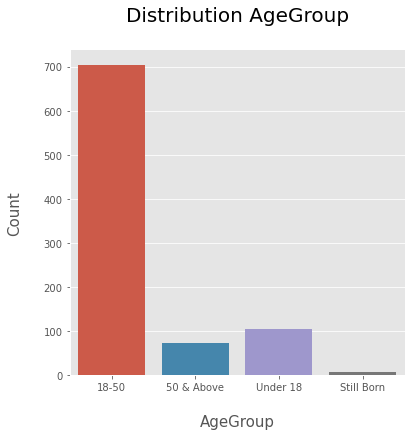

In [20]:
plt.figure(figsize=[6,6])
sns.countplot(data=titanic, x='AgeGroup')
plt.title('Distribution AgeGroup\n', fontdict={'fontsize':20})
plt.xlabel('\nAgeGroup', fontdict={'fontsize':15})
plt.ylabel('Count\n', fontdict={'fontsize':15})
plt.show()

#### Most of the passengers are middle aged between 18 and 50 followed by Under 18 age group.

### 3.1.2 Distribution of Passanger Class

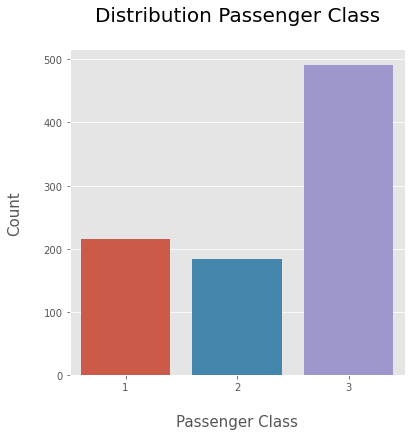

In [21]:
plt.figure(figsize=[6,6])
sns.countplot(data=titanic, x='Pclass')
plt.title('Distribution Passenger Class\n', fontdict={'fontsize':20})
plt.xlabel('\nPassenger Class', fontdict={'fontsize':15})
plt.ylabel('Count\n', fontdict={'fontsize':15})
plt.show()

#### Most of the passengers are 3rd class passangers followed by 1st class

### 3.1.3 Distribution of Sex

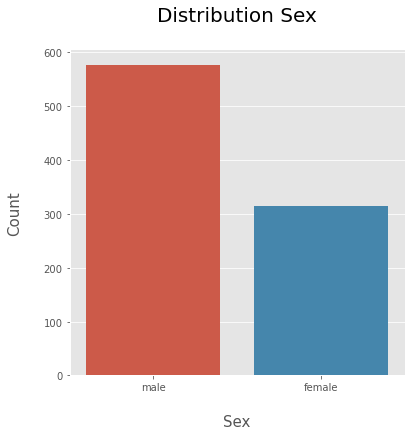

In [22]:
plt.figure(figsize=[6,6])
sns.countplot(data=titanic, x='Sex')
plt.title('Distribution Sex\n', fontdict={'fontsize':20})
plt.xlabel('\nSex', fontdict={'fontsize':15})
plt.ylabel('Count\n', fontdict={'fontsize':15})
plt.show()

#### Most of the passengers are Male.

## 3.2 Numerical Univariate analysis

### 3.1 Distribution of the Fare

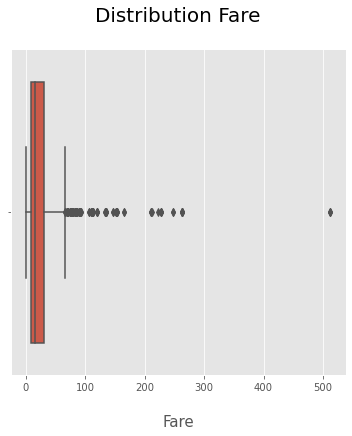

In [23]:
plt.figure(figsize=[6,6])
sns.boxplot(data=titanic, x='Fare')
plt.title('Distribution Fare\n', fontdict={'fontsize':20})
plt.xlabel('\nFare', fontdict={'fontsize':15})
plt.show()

#### From the plot, it looks like there is an extreme outlier in the Fare.
#### Also there are some datapoints above thr upper whisker but are continuous.
#### We could either handle this outlier by applying some techniques like caping, binning, etc. but since we are going to scale the numerical variables using MinMaxScaler, this will automatically fall in the range of 0 to 1.

## 3.3 Multivariate analysis

### 3.3.1 Distribution of Passenger class against survived 

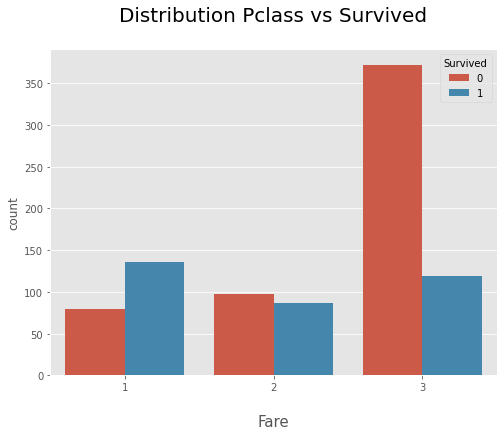

In [24]:
plt.figure(figsize=[8,6])
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.title('Distribution Pclass vs Survived\n', fontdict={'fontsize':20})
plt.xlabel('\nFare', fontdict={'fontsize':15})
plt.show()

#### Most of the passengers that survived belong to 1st class and most of the passengers who didnt belonged to 3rd class.

### 3.3.2Corrlation map of the entire dataframe

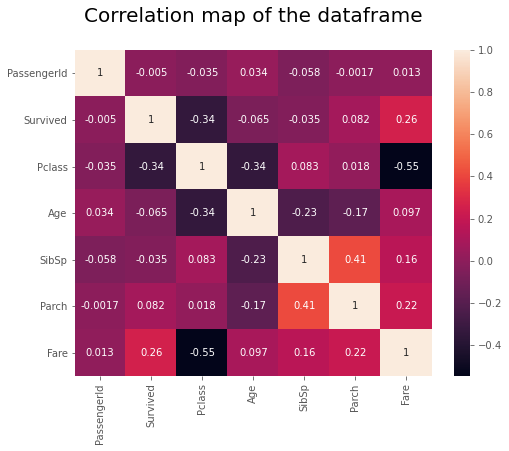

In [25]:
plt.figure(figsize=[8,6])
sns.heatmap(titanic.corr(), annot=True)
plt.title('Correlation map of the dataframe\n', fontdict={'fontsize':20})
plt.show()

#### Mostly there is negative correlation of target with other variables
#### There is also some correlation between independent variables as well, for example, Pclass and Fare have high negative correlation.

# 4. Dummy variables

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,18-50
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,18-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,18-50
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,18-50
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,18-50


## 4.1 Dummy variables for Pclass

In [27]:
dummy = pd.get_dummies(titanic.Pclass, drop_first=True, prefix='Pclass')
titanic = pd.concat([titanic,dummy], axis=1)

In [28]:
titanic.drop('Pclass', axis=1, inplace=True)

In [29]:
titanic.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,18-50,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,18-50,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,18-50,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,18-50,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,18-50,0,1


## 4.2 Dummy variables for Sex

In [30]:
dummy = pd.get_dummies(titanic.Sex, drop_first=True)
titanic = pd.concat([titanic,dummy], axis=1)

In [31]:
titanic.drop('Sex', axis=1, inplace=True)

In [32]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Pclass_2,Pclass_3,male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,18-50,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,18-50,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,18-50,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,18-50,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,18-50,0,1,1


## 4.3 Dummy variables for Embarked

In [33]:
dummy = pd.get_dummies(titanic.Embarked, drop_first=True,prefix='Embarked')
titanic = pd.concat([titanic,dummy], axis=1)

In [34]:
titanic.drop('Embarked', axis=1, inplace=True)

In [35]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,18-50,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,18-50,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,18-50,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,18-50,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,18-50,0,1,1,0,1


## 4.3 Dummy variables for AgeGroup

In [36]:
dummy = pd.get_dummies(titanic.AgeGroup, drop_first=True)
titanic = pd.concat([titanic,dummy], axis=1)

In [37]:
titanic.drop('AgeGroup', axis=1, inplace=True)

In [38]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1,0,0,0


# 5 Scaling the numeric valriables

In [39]:
num_vars = ['Fare']

In [40]:
scaler = MinMaxScaler()
titanic[num_vars] = scaler.fit_transform(titanic[num_vars])

In [41]:
titanic.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,0.014151,0,1,1,0,1,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,0.139136,0,0,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,0.015469,0,1,0,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,0.103644,0,0,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,0.015713,0,1,1,0,1,0,0,0


In [42]:
titanic.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,0.062858,0.206510,0.551066,0.647587,0.086420,0.725028,0.083053,0.007856,0.118967
std,257.353842,0.486592,13.019697,1.102743,0.806057,0.096995,0.405028,0.497665,0.477990,0.281141,0.446751,0.276117,0.088337,0.323932
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,28.000000,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,0.060508,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 6. Building the Logistic Regression Model

## 6.1 Creating X_train and y_train

In [43]:
y_train = titanic.pop('Survived')
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [44]:
X_train= titanic.loc[:,~titanic.columns.isin(['Name','Ticket','Age','PassengerId'])]
X_train.head()

,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
0,1,0,0.014151,0,1,1,0,1,0,0,0
1,1,0,0.139136,0,0,0,0,0,0,0,0
2,0,0,0.015469,0,1,0,0,1,0,0,0
3,1,0,0.103644,0,0,0,0,1,0,0,0
4,0,0,0.015713,0,1,1,0,1,0,0,0


## 6.2 Creating a function to calculate VIF

In [45]:
def calculateVIF(input_df):
    vif = pd.DataFrame()
    vif['Features'] = input_df.columns
    vif['VIF'] = [variance_inflation_factor(input_df.values, i) for i in range(input_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

## 6.1 Creating First Model

In [46]:
m1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()

In [47]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -385.30
Date:                Sat, 22 May 2021   Deviance:                       770.60
Time:                        16:06:52   Pearson chi2:                     903.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7025      0.362      7.456      0.000       1.992       3.413
SibSp         -0.3702      0.117     -3.160      0.002      -0.600      -0.141
Parch         -0.2038      0.122     -1.670      0.095      -0.443       0.035
Fare           1.7608      1.334      1.320      0.187      -0.854       4.376
Pclass_2      -0.7951      0.295     -2.699      0.007      -1.372      -0.218
Pclass_3      -1.9338      0.291     -6.646      0.000      -2.504      -1.363
male          -2.7950      0.205    -13.635      0.000      -3.197      -2.393
Embarked_Q     0.0149      0.389      0.038      0.969      -0.748       0.777
Embarked_S    -0.3774      0.245     -1.541      0.123      -0.857       0.102
50 & Above    -0.7122      0.336     -2.120      0.034      -1.371      -0.054
Still Born    23.8491   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Under 18       1.2585      0.318      3.955      0.000       0.635       1.882
==============================================================================
"""

**We see that the p-value of `Still Born` is very high and hence it is insignificant, so it should be dropped.**

## 6.3 Building Model 2

### Removing Still Born from Train set

In [48]:
X_train.drop('Still Born', axis=1, inplace=True)

In [49]:
X_train.head()

,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Under 18
0,1,0,0.014151,0,1,1,0,1,0,0
1,1,0,0.139136,0,0,0,0,0,0,0
2,0,0,0.015469,0,1,0,0,1,0,0
3,1,0,0.103644,0,0,0,0,1,0,0
4,0,0,0.015713,0,1,1,0,1,0,0


### Model 2

In [50]:
m2 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -395.42
Date:                Sat, 22 May 2021   Deviance:                       790.83
Time:                        16:06:53   Pearson chi2:                     900.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7022      0.358      7.553      0.000       2.001       3.403
SibSp         -0.3448      0.113     -3.053      0.002      -0.566      -0.123
Parch         -0.1395      0.119     -1.177      0.239      -0.372       0.093
Fare           1.6605      1.325      1.253      0.210      -0.937       4.258
Pclass_2      -0.7097      0.291     -2.438      0.015      -1.280      -0.139
Pclass_3      -1.9014      0.288     -6.593      0.000      -2.467      -1.336
male          -2.7185      0.201    -13.523      0.000      -3.112      -2.324
Embarked_Q    -0.0580      0.381     -0.152      0.879      -0.805       0.689
Embarked_S    -0.4457      0.239     -1.868      0.062      -0.913       0.022
50 & Above    -0.7585      0.334     -2.274      0.023      -1.412      -0.105
Under 18       1.1352      0.312      3.636      0.000       0.523       1.747
==============================================================================
"""

**The p-value of `Embarked_Q` is very high and hence it is insignificant, so it should be dropped.**

## 6.4 Building Model 3

### Removing Embarked_Q from Train set

In [51]:
X_train.drop('Embarked_Q', axis=1, inplace=True)

In [52]:
X_train.head()

,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Embarked_S,50 & Above,Under 18
0,1,0,0.014151,0,1,1,1,0,0
1,1,0,0.139136,0,0,0,0,0,0
2,0,0,0.015469,0,1,0,1,0,0
3,1,0,0.103644,0,0,0,1,0,0
4,0,0,0.015713,0,1,1,1,0,0


### Model 3

In [53]:
m3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -395.43
Date:                Sat, 22 May 2021   Deviance:                       790.86
Time:                        16:06:55   Pearson chi2:                     901.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6852      0.339      7.910      0.000       2.020       3.350
SibSp         -0.3451      0.113     -3.057      0.002      -0.566      -0.124
Parch         -0.1380      0.118     -1.169      0.243      -0.370       0.093
Fare           1.6724      1.322      1.265      0.206      -0.919       4.264
Pclass_2      -0.7133      0.290     -2.460      0.014      -1.282      -0.145
Pclass_3      -1.9103      0.282     -6.765      0.000      -2.464      -1.357
male          -2.7151      0.200    -13.598      0.000      -3.106      -2.324
Embarked_S    -0.4272      0.205     -2.080      0.038      -0.830      -0.025
50 & Above    -0.7581      0.333     -2.275      0.023      -1.411      -0.105
Under 18       1.1392      0.311      3.662      0.000       0.529       1.749
==============================================================================
"""

**The p-value of `Parch` is very high and hence it is insignificant, so it should be dropped.**

## 6.5 Building Model 4

### Removing Parch from Train set

In [54]:
X_train.drop('Parch', axis=1, inplace=True)

In [55]:
X_train.head()

,SibSp,Fare,Pclass_2,Pclass_3,male,Embarked_S,50 & Above,Under 18
0,1,0.014151,0,1,1,1,0,0
1,1,0.139136,0,0,0,0,0,0
2,0,0.015469,0,1,0,1,0,0
3,1,0.103644,0,0,0,1,0,0
4,0,0.015713,0,1,1,1,0,0


### Model 4

In [56]:
m4 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      882
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -396.12
Date:                Sat, 22 May 2021   Deviance:                       792.24
Time:                        16:06:56   Pearson chi2:                     904.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6822      0.336      7.983      0.000       2.024       3.341
SibSp         -0.3711      0.111     -3.343      0.001      -0.589      -0.154
Fare           1.2982      1.233      1.053      0.292      -1.119       3.715
Pclass_2      -0.7439      0.287     -2.588      0.010      -1.307      -0.181
Pclass_3      -1.9524      0.278     -7.016      0.000      -2.498      -1.407
male          -2.6670      0.194    -13.730      0.000      -3.048      -2.286
Embarked_S    -0.4450      0.204     -2.177      0.029      -0.846      -0.044
50 & Above    -0.7708      0.332     -2.324      0.020      -1.421      -0.121
Under 18       1.0794      0.307      3.518      0.000       0.478       1.681
==============================================================================
"""

**The p-value of `Fare` is very high and hence it is insignificant, so it should be dropped.**

## 6.6 Building Model 5

### Removing Fare from Train set

In [57]:
X_train.drop('Fare', axis=1, inplace=True)

In [58]:
X_train.head()

,SibSp,Pclass_2,Pclass_3,male,Embarked_S,50 & Above,Under 18
0,1,0,1,1,1,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,1,0,0
3,1,0,0,0,1,0,0
4,0,0,1,1,1,0,0


### Model 5

In [59]:
m5 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial()).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -396.73
Date:                Sat, 22 May 2021   Deviance:                       793.45
Time:                        16:06:59   Pearson chi2:                     907.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8940      0.274     10.557      0.000       2.357       3.431
SibSp         -0.3460      0.108     -3.209      0.001      -0.557      -0.135
Pclass_2      -0.8758      0.260     -3.370      0.001      -1.385      -0.366
Pclass_3      -2.1166      0.233     -9.085      0.000      -2.573      -1.660
male          -2.6822      0.194    -13.859      0.000      -3.062      -2.303
Embarked_S    -0.4746      0.202     -2.345      0.019      -0.871      -0.078
50 & Above    -0.7930      0.331     -2.399      0.016      -1.441      -0.145
Under 18       1.0759      0.307      3.508      0.000       0.475       1.677
==============================================================================
"""

**TNow the model looks good, as we do not have any more variables wirh high p-value(>0.05).**

### Checking the VIF to see if any multicollinearity is present in the model.

In [60]:
calculateVIF(X_train)

,Features,VIF
4,Embarked_S,3.21
2,Pclass_3,2.67
3,male,2.60
1,Pclass_2,1.66
0,SibSp,1.37
6,Under 18,1.29
5,50 & Above,1.12


**THere is no high multicollinearity in model.**
#### Hence this is our final model.

#### variables in final model

In [61]:
final_model_vars=['Embarked_S','Pclass_3','Pclass_2','male','SibSp','Under 18','50 & Above']

# 7 Evaluating the model on train set

## 7.1 Getting the predicted values on the train set

In [62]:
y_train_pred = m5.predict(sm.add_constant(X_train))
y_train_pred.head()

0    0.061490
1    0.927442
2    0.575124
3    0.888296
4    0.084753
dtype: float64

## 7.2 Creating  a new dataframe to hold the actual and predicted values of Target

In [63]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_Prob_Model':y_train_pred})
y_train_pred_final['Name']=titanic['Name']
y_train_pred_final.head()

,Survived,Survived_Prob_Model,Name
0,0,0.061490,"Braund, Mr. Owen Harris"
1,1,0.927442,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,0.575124,"Heikkinen, Miss. Laina"
3,1,0.888296,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0.084753,"Allen, Mr. William Henry"


## 7.3 Taking cutoff probablity of 0.5 and predicting the target

In [64]:
y_train_pred_final['Survived_Predicted'] = y_train_pred_final.Survived_Prob_Model.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob_Model,Name,Survived_Predicted
0,0,0.061490,"Braund, Mr. Owen Harris",0
1,1,0.927442,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,1,0.575124,"Heikkinen, Miss. Laina",1
3,1,0.888296,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,0,0.084753,"Allen, Mr. William Henry",0


### 7.3.1 Checking accuracy of model

#### Creating confusion matrix

In [65]:
confusion =metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Survived_Predicted)
confusion

array([[483,  66],
       [108, 234]], dtype=int64)

#### Overall accuracy

In [66]:
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_Predicted))

0.8047138047138047


**The overall accuracy for the model is approximately 80% which looks quite good**.
#### But before concluding lets check the other metrics as well

In [67]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity of the model

In [68]:
TP/float(TP+FN)

0.6842105263157895

**Sensitivity of the model also looks good.**

#### Specificity of the model

In [69]:
TN/float(TN+FP)

0.8797814207650273

**Specificity of the model is very high.**

#### False Positive Rate - Predicting Survived even though the Passenger did'nt survived

In [70]:
FP/float(TN+FP)

0.12021857923497267

**Almost 12% of the times our model predicted a person has survived even though he/she hasn't.**

#### So our model seems to have high accuracy (80.47%) and high specificity (87.97%), but the sensitivity (68.42%) is a little low.

#### Plotting ROC curve for the model

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, 
                                         y_train_pred_final.Survived_Prob_Model, drop_intermediate = False )

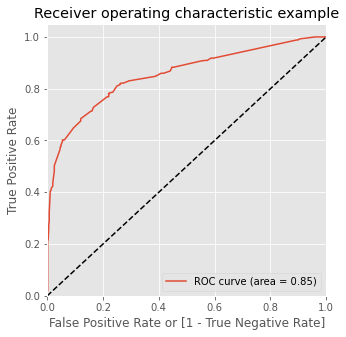

In [73]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_Prob_Model)

**We see that When the TPR(Sensitivity) increases, the FPR(1-Specificity) also increases and in essence the Specificity decreases. Hence Based on ROC we can say that the model is performing well and good.**

## 7.4 Check for Optimal Probablity Cut-off

### 7.4.1 Creating columns with different probability cutoffs

In [74]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob_Model.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob_Model,Name,Survived_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.061490,"Braund, Mr. Owen Harris",0,1,0,0,0,0,0,0,0,0,0
1,1,0.927442,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1,1,1,1,1,1,1,1
2,1,0.575124,"Heikkinen, Miss. Laina",1,1,1,1,1,1,1,0,0,0,0
3,1,0.888296,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,1,1,1,1,1,1,1,0
4,0,0.084753,"Allen, Mr. William Henry",0,1,0,0,0,0,0,0,0,0,0


### 7.4.2 Calculating accuracy sensitivity and specificity for various probability cutoffs.

In [75]:
cutoff_df = pd.DataFrame( columns = ['probablity','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probablity,accuracy,sensitivity,specificity
0.0,0.0,0.383838,1.000000,0.000000
0.1,0.1,0.616162,0.909357,0.433515
0.2,0.2,0.694725,0.859649,0.591985
0.3,0.3,0.768799,0.818713,0.737705
0.4,0.4,0.775533,0.769006,0.779599
0.5,0.5,0.804714,0.684211,0.879781
0.6,0.6,0.812570,0.599415,0.945355
0.7,0.7,0.792368,0.500000,0.974499
0.8,0.8,0.764310,0.409357,0.985428
0.9,0.9,0.695847,0.210526,0.998179


### 7.4.3 Plotting accuracy sensitivity and specificity for various probabilities.

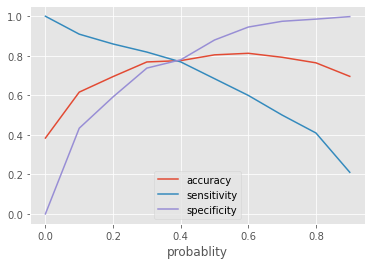

In [76]:
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'],)
plt.show()

**From the curve above, somewhere close to 0.4 is the optimum point to take it as a cutoff probability. This is because at this point, the sensitivity,specificity and accuracy intersects and at the same point the overall model accuracy is aslo good.**

### 7.4.5 Taking an optimal cutoff probablity of 0.39 and predicting train data

In [77]:
y_train_pred_final['Survived_final_predicted'] = y_train_pred_final.Survived_Prob_Model.map( lambda x: 1 if x > 0.39 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob_Model,Name,Survived_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Survived_final_predicted
0,0,0.061490,"Braund, Mr. Owen Harris",0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.927442,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.575124,"Heikkinen, Miss. Laina",1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.888296,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.084753,"Allen, Mr. William Henry",0,1,0,0,0,0,0,0,0,0,0,0


#### Dropping unnecessary columns

In [78]:
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                        inplace=True, axis=1)

In [79]:
y_train_pred_final.head()

,Survived,Survived_Prob_Model,Name,Survived_Predicted,Survived_final_predicted
0,0,0.061490,"Braund, Mr. Owen Harris",0,0
1,1,0.927442,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1
2,1,0.575124,"Heikkinen, Miss. Laina",1,1
3,1,0.888296,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1
4,0,0.084753,"Allen, Mr. William Henry",0,0


## 7.5 Checking Model Metrics with Cut-off probablity of 0.39

### 7.5.1 Accuracy

In [80]:
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_final_predicted)

0.7800224466891134

**Accuracy has droped a bit but overall the accuracy is good.**

### 7.5.2 Confusion Matrix and Positive Negative Variables

In [81]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Survived, 
                                            y_train_pred_final.Survived_final_predicted )
confusion_matrix

array([[428, 121],
       [ 75, 267]], dtype=int64)

In [82]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### 7.5.3 Sensitivity

In [83]:
TP/float(TP+FN)

0.7807017543859649

**The sensitivity of the model is increased now.**

### 7.5.4 Specificity

In [84]:
TN/float(TN+FP)

0.7795992714025501

**The specificity of the model is decreased now, but its still quite good.**

# Step 8 : Predictions on Test Set

## 8.1 Reading in Test Set

In [85]:
titanic_test = pd.read_csv('test.csv')

In [86]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 8.2. Handling Missing values

In [88]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 8.2.1 Handling Missing values in Age

In [89]:
# Replacing missing values using median of Age
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test.Age.median())

In [90]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 8.2.2 Handling missing values in Cabin

In [91]:
# Checking percentage of missing values in Cabin
(titanic_test.Cabin.isnull().sum()/titanic_test.shape[0])*100

78.22966507177034

In [92]:
# Since there are lot of missing values in Cabin, we will drop it
titanic_test.drop('Cabin', axis=1, inplace=True)

In [93]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

### 8.2.3 Handling Missing values in Fare

In [94]:
# Replacing missing values using median of Age
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test.Fare.median())

In [95]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 8.3 Creating derived column

In [96]:
titanic_test['AgeGroup']=titanic_test.Age.apply(mapAgeGroup)
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-50
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,18-50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,50 & Above
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-50
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-50


## 8.4 Dummy Variables

In [97]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-50
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,18-50
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,50 & Above
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-50
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-50


### 8.4.1 Dummy variables for Pclass

In [98]:
dummy = pd.get_dummies(titanic_test.Pclass, drop_first=True, prefix='Pclass')
titanic_test = pd.concat([titanic_test,dummy], axis=1)

In [99]:
titanic_test.drop('Pclass', axis=1, inplace=True)

In [100]:
titanic_test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,18-50,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,18-50,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,50 & Above,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,18-50,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,18-50,0,1


### 8.4.2 Dummy variables for Sex

In [101]:
dummy = pd.get_dummies(titanic_test.Sex, drop_first=True)
titanic_test = pd.concat([titanic_test,dummy], axis=1)

In [102]:
titanic_test.drop('Sex', axis=1, inplace=True)

In [103]:
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,Pclass_2,Pclass_3,male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,18-50,0,1,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,18-50,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,50 & Above,1,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,18-50,0,1,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,18-50,0,1,0


### 8.4.3 Dummy variables for Embarked

In [104]:
dummy = pd.get_dummies(titanic_test.Embarked, drop_first=True,prefix='Embarked')
titanic_test = pd.concat([titanic_test,dummy], axis=1)

In [105]:
titanic_test.drop('Embarked', axis=1, inplace=True)

In [106]:
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,18-50,0,1,1,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,18-50,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,50 & Above,1,0,1,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,18-50,0,1,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,18-50,0,1,0,0,1


### 8.4.4 Dummy variables for AgeGroup

In [107]:
dummy = pd.get_dummies(titanic_test.AgeGroup, drop_first=True)
titanic_test = pd.concat([titanic_test,dummy], axis=1)

In [108]:
titanic_test.drop('AgeGroup', axis=1, inplace=True)

In [109]:
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,1,1,1,0,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,1,0,0,1,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,1,1,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,1,1,0,1,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,1,0,0,1,0,0,0


## 8.5 Scaling the numeric valriables

In [110]:
num_vars = ['Fare']

In [111]:
titanic_test[num_vars] = scaler.transform(titanic_test[num_vars])

In [112]:
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
0,892,"Kelly, Mr. James",34.5,0,0,330911,0.015282,0,1,1,1,0,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,0.013663,0,1,0,0,1,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,0.018909,1,0,1,1,0,1,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,0.016908,0,1,1,0,1,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,0.023984,0,1,0,0,1,0,0,0


In [113]:
titanic_test.describe()

,PassengerId,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,male,Embarked_Q,Embarked_S,50 & Above,Still Born,Under 18
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,29.599282,0.447368,0.392344,0.069441,0.222488,0.521531,0.636364,0.110048,0.645933,0.086124,0.011962,0.086124
std,120.810458,12.703770,0.896760,0.981429,0.109012,0.416416,0.500135,0.481622,0.313324,0.478803,0.280884,0.108844,0.280884
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,27.000000,0.000000,0.000000,0.028213,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1204.750000,35.750000,1.000000,0.000000,0.061429,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1309.000000,76.000000,8.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8.6 Creating X_test

In [114]:
X_test = titanic_test[final_model_vars]

In [115]:
X_test.head()

,Embarked_S,Pclass_3,Pclass_2,male,SibSp,Under 18,50 & Above
0,0,1,0,1,0,0,0
1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,1
3,1,1,0,1,0,0,0
4,1,1,0,0,1,0,0


## 8.7 Making prediction

### 8.7.1 creating predicted set

In [126]:
y_test_pred = m5.predict(sm.add_constant(X_test))
y_test_pred.head()

0    0.339844
1    0.768115
2    0.303865
3    0.266989
4    0.768115
dtype: float64

### 8.7.2 Converting y_test_pred to a dataframe

In [127]:
y_test_pred_df = pd.DataFrame(y_test_pred)

In [128]:
y_test_pred_df.head()

,0
0,0.339844
1,0.768115
2,0.303865
3,0.266989
4,0.768115


In [119]:
y_test_pred_df= y_test_pred_df.rename(columns={ 0 : 'Survival_probablity'})

### 8.7.3 Predicting the Survival of passengers using the selected optimal cut-off probablity

In [120]:
y_test_pred_df['Survived'] = y_test_pred_df.Survival_probablity.map(lambda x: 1 if x > 0.7 else 0)

#### Using high cutoff probablity increases accuracy, as we need accurate models in kaggle

In [129]:
y_test_pred_df.head()

,0
0,0.339844
1,0.768115
2,0.303865
3,0.266989
4,0.768115


In [122]:
# Dropping Probablity now
y_test_pred_df.drop('Survival_probablity',axis=1, inplace=True)

In [123]:
# Adding PassengerId
y_test_pred_df['PassengerId'] = titanic_test.PassengerId

In [124]:
y_test_pred_df.head()

,Survived,PassengerId
0,0,892
1,1,893
2,0,894
3,0,895
4,1,896


In [125]:
y_test_pred_df.to_csv('titanic_predictions.csv',index=False)

In [ ]:
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived_final_predicted)